In [12]:
import pandas as pd
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /Users/nealcaren/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
df = pd.read_json('sociology-abstracts.json')
df['Year'].value_counts()

Year
2018    1076
2017    1068
2019    1033
2015    1031
2016     989
2021     983
2022     972
2020     932
2014     870
2023     843
Name: count, dtype: int64

In [14]:
df['Source title'].value_counts()

Source title
Demography                               890
Journal of Marriage and Family           757
Social Science Research                  672
Social Forces                            594
Sociological Forum                       503
Sociological Perspectives                455
American Sociological Review             417
Social Networks                          407
Sociological Methods and Research        381
Social Problems                          366
Gender and Society                       326
American Journal of Sociology            324
Journal of Health and Social Behavior    314
Sociological Inquiry                     310
Sociology of Race and Ethnicity          289
Theory and Society                       287
Sociological Science                     271
City and Community                       260
Social Currents                          255
Symbolic Interaction                     244
Qualitative Sociology                    229
Mobilization                             2

In [15]:
def first_sentence(abstract):
    sentences = sent_tokenize(abstract)
    return sentences[0]

# Apply the function to the 'Abstract' column to create the new feature
df['abstract_first_sentence'] = df['Abstract'].apply(first_sentence)

In [16]:
df['abstract_first_sentence_punctuation'] = df['abstract_first_sentence'].str[-1]
df['abstract_starts_with_a_question'] = df['abstract_first_sentence_punctuation'] == '?'
df['abstract_starts_with_a_question'].mean()

0.04899459018066755

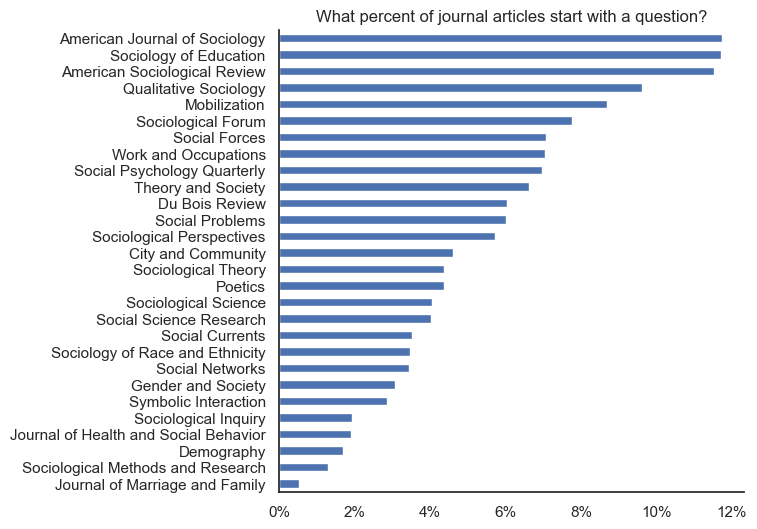

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Set the Seaborn theme
sns.set_theme(style="white")

# Create the plot with pandas, now styled by Seaborn
ax = pd.crosstab(df['Source title'],
                 df['abstract_starts_with_a_question'], normalize='index').sort_values(by=True)[True].plot(kind='barh', figsize=(6, 6))

# Add a title and possibly adjust other aspects like labels
plt.title('What percent of journal articles start with a question?')
plt.xlabel('')
plt.ylabel('')

# Format the x-axis as percentages
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Remove the top and right borders
sns.despine()

# Show the plot
plt.show()


In [22]:
df['abstract_first_word'] =  df['abstract_first_sentence'].str.split().str[0]
df[df['abstract_starts_with_a_question']]['abstract_first_word'].value_counts()[:10]

abstract_first_word
How     163
What     65
Why      59
Does     31
Do       28
When     16
Is       15
Are      12
Can      10
This      7
Name: count, dtype: int64

In [23]:
dfa = df[df['abstract_starts_with_a_question']==True].copy()

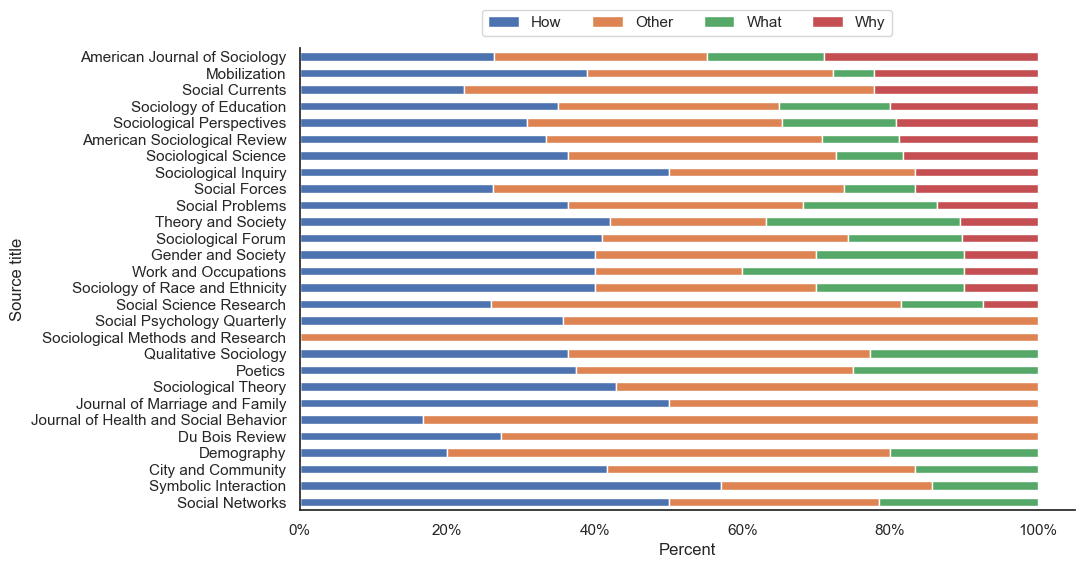

In [24]:
# Step 1: Prepare the Data
# Categorize 'abstract_first_word' into "How", "What", "Why", and "Other"
dfa['category'] = dfa['abstract_first_word'].apply(lambda x: x if x in ['How', 'What', 'Why'] else 'Other')

# Create a crosstab/pivot table for the count or proportion of each category by 'Source title'
data_for_plot = pd.crosstab(dfa['Source title'], dfa['category'], normalize='index').sort_values(by='Why')

# Step 2: Plot the Stacked Bar Plot
# Set the Seaborn theme
sns.set_theme(style="white")

# Plot
ax = data_for_plot.plot(kind='barh', stacked=True, figsize=(10, 6))

# Add a title and adjust labels
plt.xlabel('Percent')
plt.ylabel('Source title')

# Format the x-axis as percentages
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

# Remove the top and right borders
sns.despine()

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4)

# Show the plot
plt.show()